In [4]:
# usual packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import h5py

import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

# machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler#,Imputer

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# NEURAL NETWORK

In [5]:
## Read NHS data from table "average_properties.txt"
T = pd.read_csv('../TOST_data/average_properties.txt',sep='\t',index_col=0,na_values=-99)
T.columns.values

array(['BABY_IDS', 'GENDER', 'WEIGHT_GRAMS', 'GEST_AGE_DAYS', 'DELIVERY',
       'BIRTH_DATE', 'FILE', 'DELTA_SEC_MEASURE', 'MED_SPO2', 'MED_PR',
       'MED_PI', 'MEAN_SPO2', 'MEAN_PR', 'MEAN_PI', 'STD_SPO2', 'STD_PR',
       'STD_PI', 'PHN', 'WRIST', 'FOOT', 'BRADY_SEC_PR', 'BRADY_RATIO_PR',
       'BRADY_RATIO_PR_m10', 'BRADY_RATIO_PR_m20', 'BRADY_RATIO_PR_m30',
       'BRADY_RATIO_PR_m40', 'BRADY_SEC_SPO2', 'BRADY_RATIO_SPO2',
       'BRADY_SEC_PR_DYN', 'BRADY_RATIO_PR_DYN', 'BRADY_NUM_PER_HOUR_PR',
       'BRADY_NUM_PER_HOUR_PR_m10', 'BRADY_NUM_PER_HOUR_PR_m20',
       'BRADY_NUM_PER_HOUR_PR_m30', 'BRADY_NUM_PER_HOUR_PR_m40',
       'BRADY_NUM_PER_HOUR_PR_dyn', 'BRADY_NUM_PER_HOUR_PR_anytime',
       'BRADY_NUM_PER_HOUR_PR_m10_anytime',
       'BRADY_NUM_PER_HOUR_PR_m20_anytime',
       'BRADY_NUM_PER_HOUR_PR_m30_anytime',
       'BRADY_NUM_PER_HOUR_PR_m40_anytime',
       'BRADY_NUM_PER_HOUR_PR_dyn_anytime', 'BRADY_DURATION_MEDIAN_PR',
       'BRADY_DURATION_MEDIAN_PR_m10', 'BRAD

In [121]:
INPUT_COLUMNS = ['MED_PR','MEAN_PR']#,'DELTA_SEC_MEASURE','WEIGHT_GRAMS','GEST_AGE_DAYS']#,'MEAN_SPO2','MED_SPO2']
print(INPUT_COLUMNS,"\n")
print('Number of features: ',len(INPUT_COLUMNS))

['MED_PR', 'MEAN_PR'] 

Number of features:  2


In [122]:
INPUT = []
for i in range(len(INPUT_COLUMNS)):
    INPUT.append(np.array(T[INPUT_COLUMNS[i]]))
INPUT = np.array(INPUT).T

In [123]:
INPUT.shape

(764, 2)

In [124]:
OUTPUT_COLUMN = 'BRADY_RATIO_PR' # BRADY_NUM_PER_HOUR_PR
OUTPUT = np.array(T[OUTPUT_COLUMN])
#OUTPUT = np.array(T['BRADY_NUM_PER_HOUR_PR'])

In [125]:
OUTPUT.shape

(764,)

In [126]:
# NORMALISATION
scaler = StandardScaler()
scaler.fit(INPUT)
INPUT_NORM = scaler.transform(INPUT)

In [127]:
# SPLIT TRAIN AND TEST
input_train,input_test, output_train, output_test = train_test_split(INPUT_NORM, OUTPUT, test_size=0.2)

In [128]:
print ("training sample size: ",len(input_train))
print ("test sample size: ",len(input_test))
print ("train + test (total sample) = ", len(input_train)+len(input_test))
print ("train / sample =", round(float(len(input_train))/float(len(INPUT_NORM)),1))
print ("test / sample =", round(float(len(input_test))/float(len(INPUT_NORM)),1))

training sample size:  611
test sample size:  153
train + test (total sample) =  764
train / sample = 0.8
test / sample = 0.2


# Model

In [129]:
# DEFINE MODEL ARCHITECTURE
model = Sequential()
model.add(Dense(15,input_dim=2,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))

In [130]:
# CREATE MODEL 
model.compile(loss='mean_absolute_error', 
              optimizer='adam',
              metrics=['accuracy'] )

In [131]:
# TRAIN THE MODEL

# stop training if after 10 iterations 
# the results has not improved
early_stopping = EarlyStopping(monitor='loss',
                               patience=10)

N_EPOCHS = 600
BATCH_SIZE = 5
VALIDATION_FRACTION = 0.33
hist = model.fit(input_train,
                 output_train,
                 epochs=N_EPOCHS,
                 shuffle=True,
                 batch_size=BATCH_SIZE,
                 validation_split=VALIDATION_FRACTION,
                 callbacks=[early_stopping])

Train on 409 samples, validate on 202 samples
Epoch 1/600
409/409 [==============================] - 1s 3ms/step - loss: 0.4307 - acc: 0.0538 - val_loss: 0.3768 - val_acc: 0.0693
Epoch 2/600
409/409 [==============================] - 0s 921us/step - loss: 0.3683 - acc: 0.0562 - val_loss: 0.3402 - val_acc: 0.0693
Epoch 3/600
409/409 [==============================] - 0s 1ms/step - loss: 0.3350 - acc: 0.0562 - val_loss: 0.3052 - val_acc: 0.0693
Epoch 4/600
409/409 [==============================] - 0s 1ms/step - loss: 0.3020 - acc: 0.0562 - val_loss: 0.2730 - val_acc: 0.0693
Epoch 5/600
409/409 [==============================] - 0s 908us/step - loss: 0.2721 - acc: 0.0562 - val_loss: 0.2456 - val_acc: 0.0693
Epoch 6/600
409/409 [==============================] - 0s 1ms/step - loss: 0.2467 - acc: 0.0562 - val_loss: 0.2209 - val_acc: 0.0693
Epoch 7/600
409/409 [==============================] - 0s 1ms/step - loss: 0.2215 - acc: 0.0562 - val_loss: 0.1990 - val_acc: 0.0693
Epoch 8/600
409/409

Epoch 62/600
409/409 [==============================] - 0s 791us/step - loss: 0.0521 - acc: 0.0782 - val_loss: 0.0557 - val_acc: 0.0842
Epoch 63/600
409/409 [==============================] - 0s 900us/step - loss: 0.0536 - acc: 0.0782 - val_loss: 0.0534 - val_acc: 0.0842
Epoch 64/600
409/409 [==============================] - 0s 701us/step - loss: 0.0520 - acc: 0.0782 - val_loss: 0.0533 - val_acc: 0.0842
Epoch 65/600
409/409 [==============================] - 0s 856us/step - loss: 0.0536 - acc: 0.0782 - val_loss: 0.0535 - val_acc: 0.0842
Epoch 66/600
409/409 [==============================] - 0s 947us/step - loss: 0.0524 - acc: 0.0782 - val_loss: 0.0563 - val_acc: 0.0842
Epoch 67/600
409/409 [==============================] - 0s 1ms/step - loss: 0.0520 - acc: 0.0782 - val_loss: 0.0561 - val_acc: 0.0842
Epoch 68/600
409/409 [==============================] - 0s 1ms/step - loss: 0.0514 - acc: 0.0782 - val_loss: 0.0540 - val_acc: 0.0842
Epoch 69/600
409/409 [==============================

In [132]:
l,a = model.evaluate(input_test,output_test)#[0]
#a = model.evaluate(input_test,output_test)[1]
print('NUMBER OF INPUT VARIABLES = ',len(INPUT_COLUMNS))
print('INPUT VARIABLES = ',INPUT_COLUMNS)
print('OUTPUT = ',OUTPUT_COLUMN)
print('NUMBER OF EPOCHS = ',N_EPOCHS)
print('VALIDATION FRACTION = ',VALIDATION_FRACTION)
print('BATCH SIZE = ',BATCH_SIZE)
print('Model loss function =\t%.2f\nModel Accuracy =\t%.2f'%(l,a))
print('2 layers')

153/153 [==============================] - 0s 66us/step
NUMBER OF INPUT VARIABLES =  2
INPUT VARIABLES =  ['MED_PR', 'MEAN_PR']
OUTPUT =  BRADY_RATIO_PR
NUMBER OF EPOCHS =  600
VALIDATION FRACTION =  0.33
BATCH SIZE =  5
Model loss function =	0.05
Model Accuracy =	0.10
2 layers


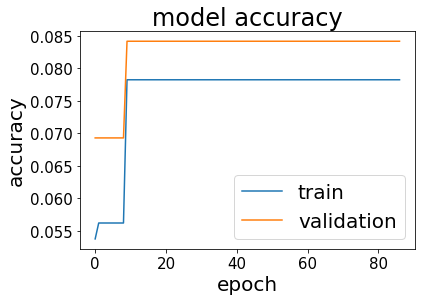

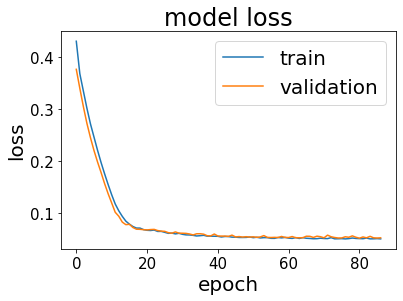

In [133]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [134]:
# variable descibing the training
history_dict = hist.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [135]:
# prediction on the test sample
prediction = model.predict(input_test)

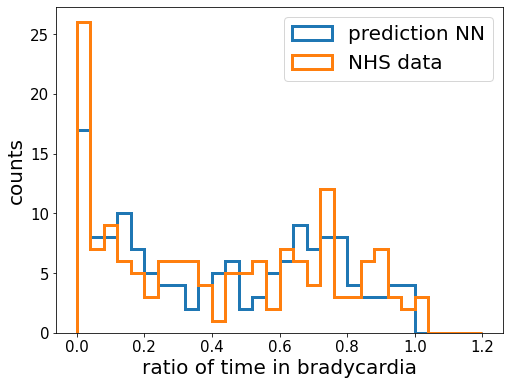

In [136]:
# distribution of prediction vs real data
plt.figure(figsize=(8,6))
plt.hist(prediction,bins=30,lw=3,histtype='step',label=r'prediction NN',range=(0,1.2)) # range=(0.,60.)
plt.hist(output_test,bins=30,lw=3,histtype='step',label=r'NHS data',range=(0,1.2))
#plt.xlabel('number of episodes of bradycardia (thr 120)',fontsize=20)
plt.xlabel('ratio of time in bradycardia',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.legend(fontsize=20)
plt.show()

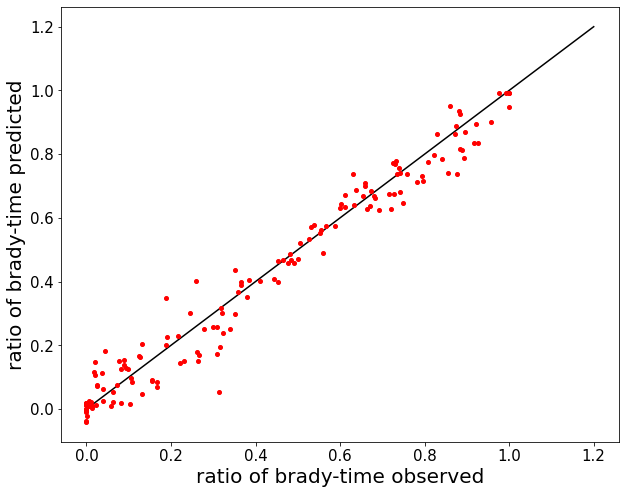

In [137]:
# plot of prediction vs real data
plt.figure(figsize=(10,8))
#plt.plot([0.,120.],[0.,120.])
#plt.plot([0.,60.],[0.,60.],'k')
plt.plot([0.,1.2],[0.,1.2],'k')

plt.plot(output_test,prediction,".r",markersize=8)
#plt.xlim(-0.5,20.)
#plt.ylim(-0.5,20.)
#plt.xlabel(r'number of brady-episodes observed',fontsize=20)
#plt.ylabel(r'number of brady-episodes predicted',fontsize=20)
plt.xlabel(r'ratio of brady-time observed',fontsize=20)
plt.ylabel(r'ratio of brady-time predicted',fontsize=20)
plt.show()

# Looking for relation that the NN is likely to learn

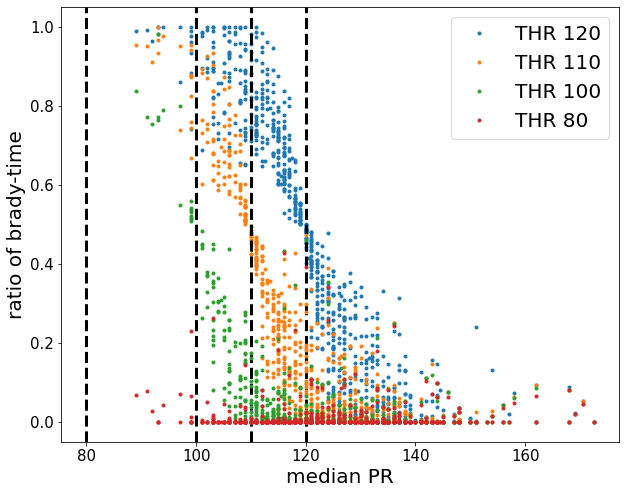

In [37]:
plt.figure(figsize=(10,8))
plt.plot(T['MED_PR'],T['BRADY_RATIO_PR'],".",label='THR 120')
plt.axvline(120,color="k",ls='dashed',lw='3')
plt.plot(T['MED_PR'],T['BRADY_RATIO_PR_m10'],".",label='THR 110')
plt.axvline(110,color="k",ls='dashed',lw='3')
plt.plot(T['MED_PR'],T['BRADY_RATIO_PR_m20'],".",label='THR 100')
plt.axvline(100,color="k",ls='dashed',lw='3')
#plt.plot(T['MED_PR'],T['BRADY_RATIO_PR_m30'],".",label='THR DYN')
#plt.axvline(90,color="k",ls='dashed',lw='3')
plt.plot(T['MED_PR'],T['BRADY_RATIO_PR_m40'],".",label='THR 80')
plt.axvline(80,color="k",ls='dashed',lw='3')
plt.xlabel('median PR')
plt.ylabel('ratio of brady-time')
plt.legend()
plt.show()

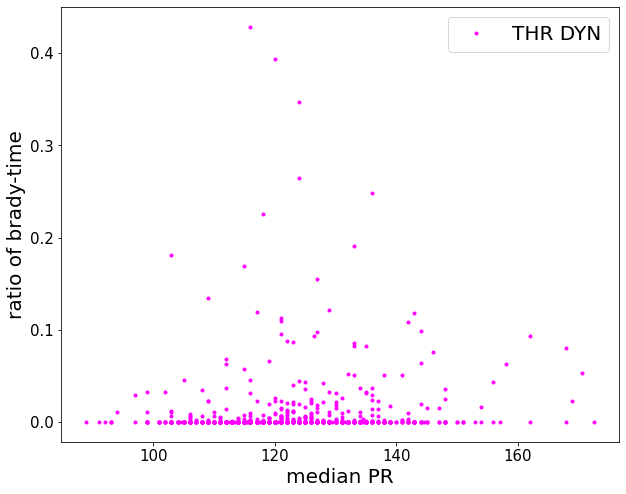

In [32]:
plt.figure(figsize=(10,8))
#plt.plot(T['MED_PR'],T['BRADY_RATIO_PR'],".",label='THR 120')
#plt.axvline(120,color="k",ls='dashed',lw='3')
#plt.plot(T['MED_PR'],T['BRADY_RATIO_PR_m10'],".",label='THR 110')
#plt.axvline(110,color="k",ls='dashed',lw='3')
#plt.plot(T['MED_PR'],T['BRADY_RATIO_PR_m20'],".",label='THR 100')
#plt.axvline(100,color="k",ls='dashed',lw='3')
plt.plot(T['MED_PR'],T['BRADY_RATIO_PR_DYN'],".",label='THR DYN',color='magenta')
plt.xlabel('median PR')
plt.ylabel('ratio of brady-time')
plt.legend()
plt.show()

In [ ]:
# Number of episodes

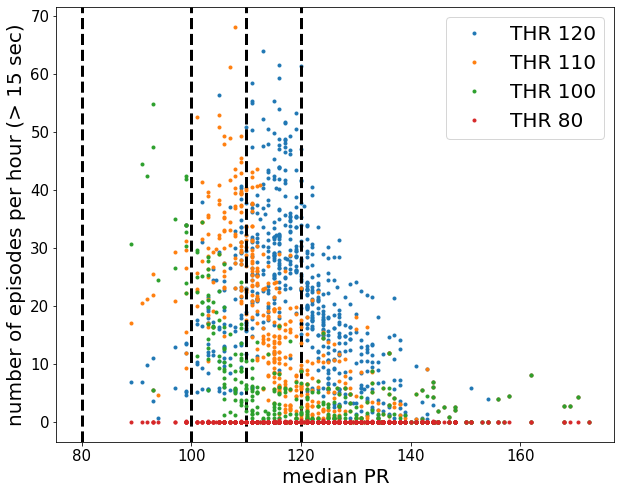

In [55]:
plt.figure(figsize=(10,8))
plt.plot(T['MED_PR'],T['BRADY_NUM_PER_HOUR_PR'],".",label='THR 120')
plt.axvline(120,color="k",ls='dashed',lw='3')
plt.plot(T['MED_PR'],T['BRADY_NUM_PER_HOUR_PR_m10'],".",label='THR 110')
plt.axvline(110,color="k",ls='dashed',lw='3')
plt.plot(T['MED_PR'],T['BRADY_NUM_PER_HOUR_PR_m20'],".",label='THR 100')
plt.axvline(100,color="k",ls='dashed',lw='3')
#plt.plot(T['MED_PR'],T['BRADY_RATIO_PR_m30'],".",label='THR 90')
#plt.axvline(90,color="k",ls='dashed',lw='3')
plt.plot(T['MED_PR'],T['BRADY_RATIO_PR_m40'],".",label='THR 80')
plt.axvline(80,color="k",ls='dashed',lw='3')
plt.xlabel('median PR')
plt.ylabel('number of episodes per hour (> 15 sec)')
plt.legend()
plt.show()

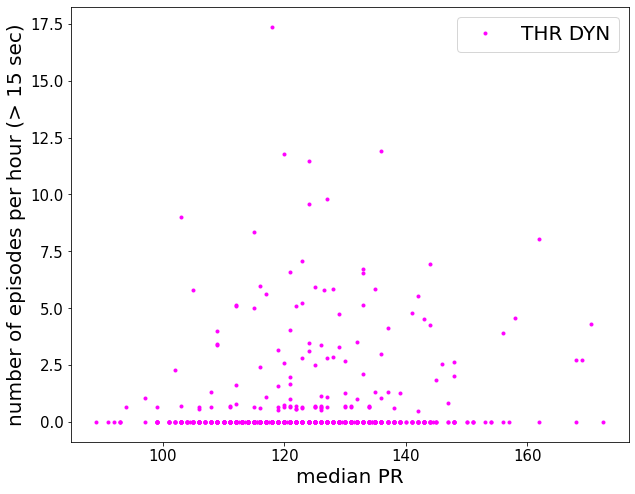

In [57]:
plt.figure(figsize=(10,8))
plt.plot(T['MED_PR'],T['BRADY_NUM_PER_HOUR_PR_dyn'],".",label='THR DYN',color='magenta')
#plt.axvline(120,color="k",ls='dashed',lw='3')
#plt.plot(T['MED_PR'],T['BRADY_NUM_PER_HOUR_PR_m10'],".",label='THR 110')
#plt.axvline(110,color="k",ls='dashed',lw='3')
#plt.plot(T['MED_PR'],T['BRADY_NUM_PER_HOUR_PR_m20'],".",label='THR 100')
#plt.axvline(100,color="k",ls='dashed',lw='3')
#plt.plot(T['MED_PR'],T['BRADY_RATIO_PR_m30'],".",label='THR 90')
#plt.axvline(90,color="k",ls='dashed',lw='3')
#plt.plot(T['MED_PR'],T['BRADY_RATIO_PR_m40'],".",label='THR 80')
#plt.axvline(80,color="k",ls='dashed',lw='3')
plt.xlabel('median PR')
plt.ylabel('number of episodes per hour (> 15 sec)')
plt.legend()
plt.show()